In [106]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec

%matplotlib inline
sns.set()

In [2]:
data = pd.read_excel('student_survey.xls')
data.head()

,Course,Handed,Sex,Verbal,Age
0,Social,left,male,470,18.83
1,Social,right,female,650,18.67
2,Social,right,male,580,20.08
3,Social,right,female,660,18.5
4,Social,right,female,790,24.25


In [28]:
data.dtypes

Course     object
Handed     object
Sex        object
Verbal    float64
Age        object
dtype: object

In [29]:
data['Verbal'] = pd.to_numeric(data.Verbal, errors='coerce')
data['Age'] = pd.to_numeric(data.Age, errors='coerce')

In [31]:
sample = data.sample(192)
sample.head()

,Course,Handed,Sex,Verbal,Age
640,Natural,right,male,680.0,20.25
743,Social,right,female,590.0,45.33
1037,Business,right,male,NaN,18.67
347,Social,right,male,640.0,19.83
670,Natural,right,female,600.0,19.50


## Compare handedness of population vs sample

### Full population

In [104]:
full_handedness = data.Handed.value_counts() / data.Handed.count()
sample_handedness = sample.Handed.value_counts() / sample.Handed.count()

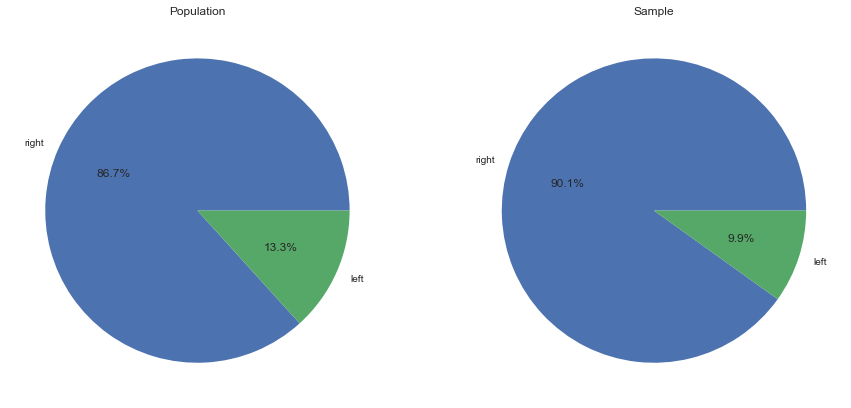

In [153]:
grid = GridSpec(1, 2)
labels = full_handedness.index
plt.figure(figsize=(15, 15))
# population
plt.subplot(grid[0, 0], aspect=1)
plt.pie(full_handedness, labels=labels, autopct='%1.1f%%')
plt.title('Population')
# sample
plt.subplot(grid[0, 1], aspect=1)
plt.pie(sample_handedness, labels=labels, autopct='%1.1f%%')
plt.title('Sample')
# plot
plt.show()

The sample seems to be unbiased and represent well the full data set. The differences between proportions of left vs right handed people are below 5%.

## Gender: Population vs Sample

In [150]:
full_gender = data.Sex.value_counts() / data.Sex.count()
sample_gender = sample.Sex.value_counts() / sample.Sex.count()

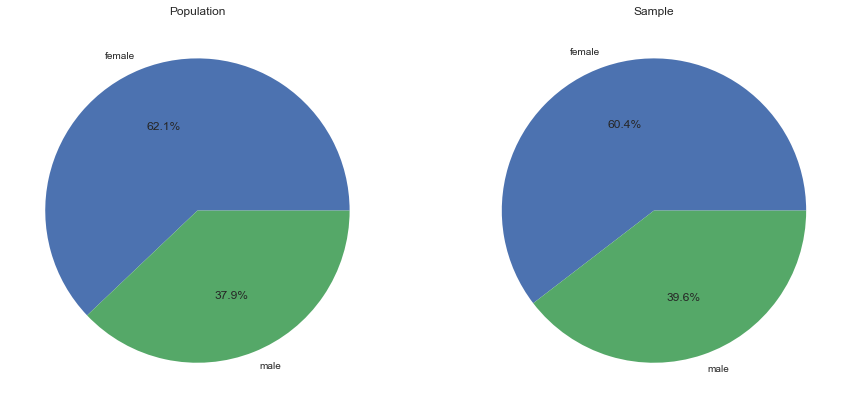

In [154]:
grid = GridSpec(1, 2)
plt.figure(figsize=(15, 15))
labels = full_gender.index
# population
plt.subplot(grid[0, 0], aspect=1)
plt.pie(full_gender, labels=labels, autopct='%1.1f%%')
plt.title('Population')
# sample
plt.subplot(grid[0, 1], aspect=1)
plt.pie(sample_gender, labels=labels, autopct='%1.1f%%')
plt.title('Sample')
plt.show()

When comparing the sex distribution of the population vs the random sample, the sample seems to represent well the population, where 62.1% were females and 37.9% were males, vs 60.4% females and 39.6% males in for the sample.

## SAT: Population vs Sample

In [163]:
data.Verbal.describe()

count    998.000000
mean     588.780561
std       76.081470
min      300.000000
25%      540.000000
50%      590.000000
75%      640.000000
max      800.000000
Name: Verbal, dtype: float64

In [38]:
sample.Verbal.describe()

count    169.000000
mean     598.520710
std       73.508186
min      425.000000
25%      540.000000
50%      600.000000
75%      650.000000
max      790.000000
Name: Verbal, dtype: float64

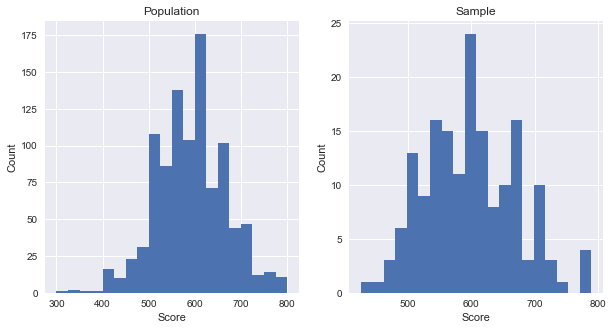

In [187]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax0.hist(data.Verbal.dropna(), bins=20)  # dropna to avoid matplotlib error
ax0.set_title('Population')
ax0.set_ylabel('Count')
ax0.set_xlabel('Score')
ax1.hist(sample.Verbal.dropna(), bins=20)
ax1.set_title('Sample')
ax1.set_ylabel('Count')
ax1.set_xlabel('Score')
plt.show()

The mean of SAT scores for the population 588.9 vs 598.5 for the sample indicates that they are comparable, the std reinforces this 76.1 for the population vs 73.5 for the sample.

## Age: Population vs Sample

In [42]:
data.Age.describe()

count    1123.000000
mean       20.374898
std         3.188835
min        17.670000
25%        19.080000
50%        19.670000
75%        20.670000
max        74.170000
Name: Age, dtype: float64

In [47]:
sample.Age.describe()

count    192.000000
mean      20.361875
std        3.061353
min       17.920000
25%       18.980000
50%       19.670000
75%       20.420000
max       45.330000
Name: Age, dtype: float64

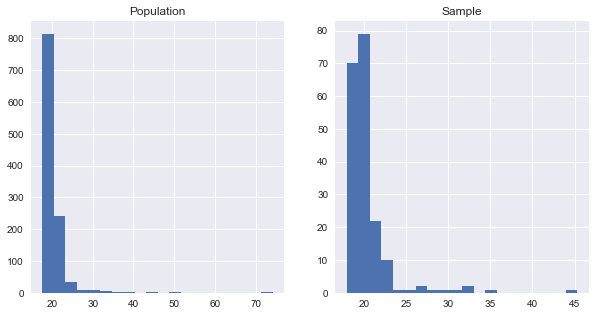

In [191]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.hist(data.Age.dropna(), bins=20)
ax0.set_title('Population')
ax1.hist(sample.Age.dropna(), bins=20)
ax1.set_title('Sample')
plt.show()

Since the age is right skewed we look at the median, for the population is 19.7 vs 19.7 for the sample, this means the sample does represent the population quite well. The range of the population is much larger 56.5 vs 27.41, this is caused by outliers on the full population, the IQR supports the idea that the sample represents well the population, 1.59 for the population vs 1.44 for the sample.

## Business students sample

In [50]:
business = data.loc[data.Course == 'Business', :]
business.head()

,Course,Handed,Sex,Verbal,Age
118,Business,right,male,500.0,18.08
119,Business,right,female,640.0,19.92
120,Business,right,male,530.0,19.58
121,Business,left,male,480.0,18.50
139,Business,right,male,520.0,19.42


### Descriptive Statistics

In [51]:
business.describe()

,Verbal,Age
count,171.000000,192.000000
mean,574.649123,20.306771
std,74.065907,4.785640
min,340.000000,17.670000
25%,530.000000,18.830000
50%,580.000000,19.500000
75%,620.000000,20.250000
max,760.000000,74.170000


### Handedness

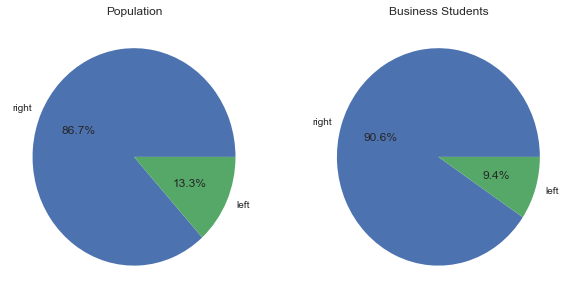

In [200]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
labels = ['right', 'left']
# population
ax0.pie(data.Handed.value_counts(), labels=labels, autopct='%1.1f%%')
ax0.set_title('Population')
# sample
ax1.pie(business.Handed.value_counts(), labels=labels, autopct='%1.1f%%')
ax1.set_title('Business Students')
plt.show()

### Gender

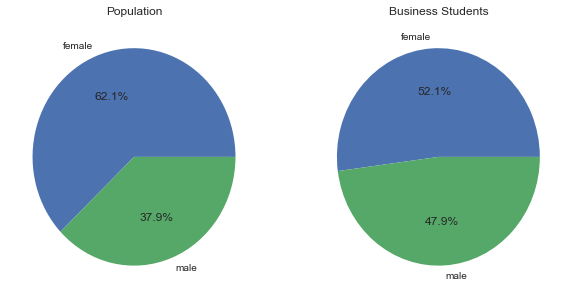

In [199]:
fix, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
labels = ['female', 'male']
# population
ax0.pie(data.Sex.value_counts(), labels=labels, autopct='%1.1f%%')
ax0.set_title('Population')
# business
ax1.pie(business.Sex.value_counts(), labels=labels, autopct='%1.1f%%')
ax1.set_title('Business Students')
plt.show()

### SAT Verbal Scores

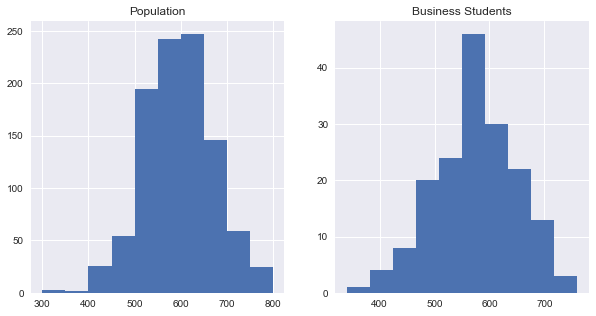

In [203]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
# population
ax0.hist(data.Verbal.dropna(), bins=10)
ax0.set_title('Population')
# business
ax1.hist(business.Verbal.dropna(), bins=10)
ax1.set_title('Business Students')
plt.show()

### Age

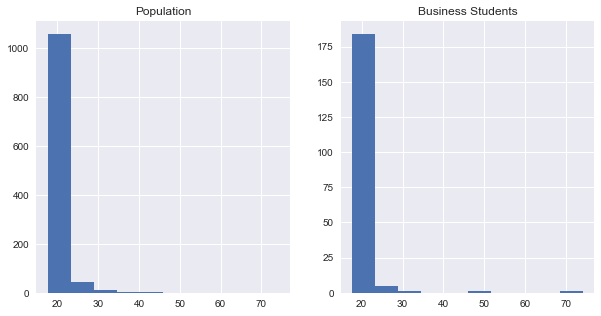

In [205]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
# population
ax0.hist(data.Age.dropna(), bins=10)
ax0.set_title('Population')
# business
ax1.hist(business.Age.dropna(), bins=10)
ax1.set_title('Business Students')
# plot
plt.show()